In [15]:
%conda install pandas gdal scikit-learn scikit-image scipy matplotlib seaborn seaborn-image

Channels:
 - defaults
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - seaborn-image

Current channels:

  - https://repo.anaconda.com/pkgs/main
  - https://repo.anaconda.com/pkgs/r

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
from pathlib import Path
from dotenv import load_dotenv
import rasterio
import numpy as np
from rasterio.plot import show
import os
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')
os.chdir("/home/me/workspace/det_remota/trabalho_final")

In [17]:
infrared_images = [
    rasterio.open(image_file)
    for image_file in Path(os.getcwd()).glob('data/sentinel2/COLOR_INFRARED_*.tiff')
]
swir_images = [
    rasterio.open(image_file)
    for image_file in Path(os.getcwd()).glob('data/sentinel2/SWIR_*.tiff')
]

In [18]:
infrared_images[0].files[0].split('/')[-1]

'COLOR_INFRARED_2017-05-15_2017-05-31.tiff'

In [19]:
import pandas as pd
import re
import datetime
import seaborn as sns


FILENAME_PATTERN = r'(.*)_(\d{4}-\d{2}-\d{2})_(\d{4}-\d{2}-\d{2}).tiff'

def filter_low_info_images(images):
    def image_stats(img):
        channels = [img.read(channel) for channel in range(1,4)]

        stats_dict = {}
        for channel_name, channel in zip(['R', 'G', 'B'], channels):
            stats_dict[f'{channel_name}_mean'] = np.mean(channel)
            stats_dict[f'{channel_name}_std'] = np.std(channel)

        stats_dict['global_mean'] = np.mean(channels)
        stats_dict['global_std'] = np.std(channels)
        return stats_dict
    
    def image_info(img):
        filename = img.files[0].split('/')[-1]
        layer, from_date, to_date = re.findall(FILENAME_PATTERN, filename)[0]
        
        return {
            "filename": filename,
            "layer": layer,
            "from_date": datetime.date.fromisoformat(from_date),
            "to_date": datetime.date.fromisoformat(to_date),
        }

    return pd.DataFrame([
        {
            **image_stats(image),
            **image_info(image),
        }
        for image in images
    ])

infrared_stats = filter_low_info_images(infrared_images)
swir_stats = filter_low_info_images(swir_images)

infrared_stats

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

,R_mean,R_std,G_mean,G_std,B_mean,B_std,global_mean,global_std,filename,layer,from_date,to_date
0,233.061172,31.671954,152.115492,80.625594,162.601926,76.416863,182.592863,75.759915,COLOR_INFRARED_2017-05-15_2017-05-31.tiff,COLOR_INFRARED,2017-05-15,2017-05-31
1,217.440684,32.135410,63.739389,39.037379,58.179505,21.577458,113.119859,80.336575,COLOR_INFRARED_2019-07-01_2019-07-14.tiff,COLOR_INFRARED,2019-07-01,2019-07-14
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,COLOR_INFRARED_2016-02-15_2016-02-29.tiff,COLOR_INFRARED,2016-02-15,2016-02-29
3,239.959859,9.720555,119.529286,28.740036,141.297919,23.516704,166.929021,56.893778,COLOR_INFRARED_2016-10-15_2016-10-31.tiff,COLOR_INFRARED,2016-10-15,2016-10-31
4,221.594860,30.138155,76.010260,44.864767,65.488682,23.640244,121.031267,78.961853,COLOR_INFRARED_2020-08-01_2020-08-14.tiff,COLOR_INFRARED,2020-08-01,2020-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...
105,223.651970,29.715558,55.312371,34.435527,56.294636,21.430625,111.752993,84.282552,COLOR_INFRARED_2017-07-01_2017-07-14.tiff,COLOR_INFRARED,2017-07-01,2017-07-14
106,216.676319,32.744623,56.464965,33.703291,55.134042,19.536631,109.425109,81.332488,COLOR_INFRARED_2019-06-15_2019-06-30.tiff,COLOR_INFRARED,2019-06-15,2019-06-30
107,233.508667,25.477784,60.633102,29.247946,70.595947,18.880735,121.579239,83.072191,COLOR_INFRARED_2018-09-15_2018-09-30.tiff,COLOR_INFRARED,2018-09-15,2018-09-30
108,221.690255,29.229054,76.315991,42.785819,69.630874,22.533427,122.545707,77.372533,COLOR_INFRARED_2019-09-01_2019-09-14.tiff,COLOR_INFRARED,2019-09-01,2019-09-14


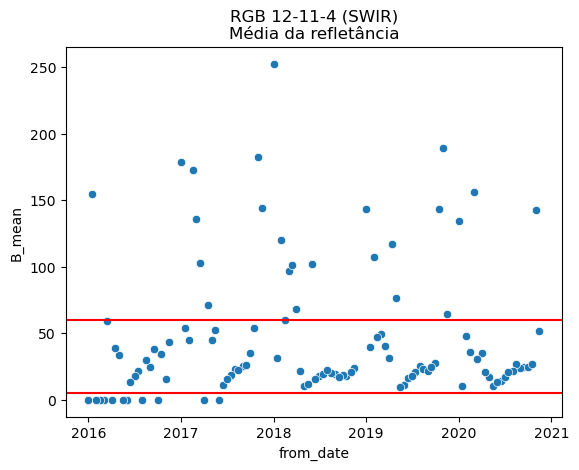

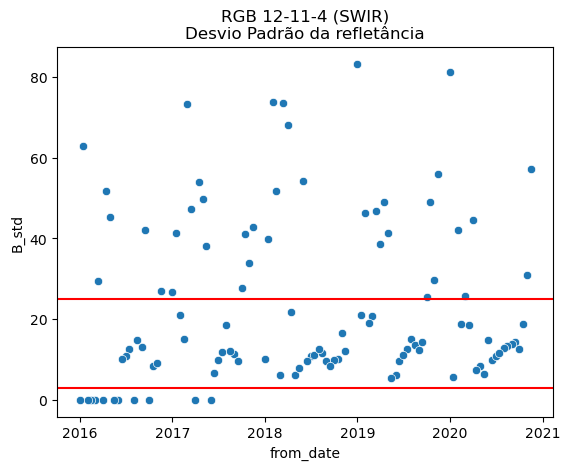

In [21]:
sns.scatterplot(swir_stats, x='from_date', y='B_mean')
plt.axhline(5, color='red')
plt.axhline(60, color='red')
plt.title('RGB 12-11-4 (SWIR)\nMédia da refletância')
plt.show()

sns.scatterplot(swir_stats, x='from_date', y='B_std')
plt.axhline(3, color='red')
plt.axhline(25, color='red')
plt.title('RGB 12-11-4 (SWIR)\nDesvio Padrão da refletância')
plt.show()

In [22]:
import shutil


LOW_INFO_IMAGES_PATH = Path('data/sentinel2/low_info')

if not LOW_INFO_IMAGES_PATH.exists():
    LOW_INFO_IMAGES_PATH.mkdir(parents=True)

In [23]:
swir_low_info_files = swir_stats.loc[
    (swir_stats['B_mean'] < 5) |\
        (swir_stats['B_mean'] > 60)  |\
        (swir_stats['B_std'] < 3) |\
        (swir_stats['B_std'] > 25),
    'filename'
].unique()

for img in swir_images:
    img_path = img.files[0]
    filename = img_path.split('/')[-1]
    
    if filename in swir_low_info_files:
        print(filename)
        shutil.move(img_path, LOW_INFO_IMAGES_PATH.joinpath(filename))

print(f"{len(swir_low_info_files)} files were identified as non-relevant")

SWIR_2016-09-15_2016-09-30.tiff
SWIR_2019-11-01_2019-11-14.tiff
SWIR_2016-03-15_2016-03-31.tiff
SWIR_2017-01-01_2017-01-14.tiff
SWIR_2018-02-15_2018-02-28.tiff
SWIR_2016-03-01_2016-03-14.tiff
SWIR_2017-04-15_2017-04-30.tiff
SWIR_2016-06-01_2016-06-14.tiff
SWIR_2017-05-15_2017-05-31.tiff
SWIR_2016-05-01_2016-05-14.tiff
SWIR_2018-06-01_2018-06-14.tiff
SWIR_2017-05-01_2017-05-14.tiff
SWIR_2018-04-01_2018-04-14.tiff
SWIR_2019-01-01_2019-01-14.tiff
SWIR_2016-11-15_2016-11-30.tiff
SWIR_2016-04-01_2016-04-14.tiff
SWIR_2019-11-15_2019-11-30.tiff
SWIR_2017-04-01_2017-04-14.tiff
SWIR_2020-02-01_2020-02-14.tiff
SWIR_2016-05-15_2016-05-31.tiff
SWIR_2017-02-15_2017-02-28.tiff
SWIR_2019-02-01_2019-02-14.tiff
SWIR_2018-01-15_2018-01-31.tiff
SWIR_2016-10-01_2016-10-14.tiff
SWIR_2019-10-01_2019-10-14.tiff
SWIR_2016-01-01_2016-01-14.tiff
SWIR_2018-01-01_2018-01-14.tiff
SWIR_2016-08-01_2016-08-14.tiff
SWIR_2016-01-15_2016-01-31.tiff
SWIR_2016-02-15_2016-02-29.tiff
SWIR_2017-11-15_2017-11-30.tiff
SWIR_201

In [24]:
infrared_low_info_files = [
    swir_filename.replace('SWIR_', 'COLOR_INFRARED_')
    for swir_filename in swir_low_info_files
]

for img in infrared_images:
    img_path = img.files[0]
    filename = img_path.split('/')[-1]
    
    if filename in infrared_low_info_files:
        print(filename)
        shutil.move(img_path, LOW_INFO_IMAGES_PATH.joinpath(filename))

COLOR_INFRARED_2017-05-15_2017-05-31.tiff
COLOR_INFRARED_2016-02-15_2016-02-29.tiff
COLOR_INFRARED_2020-11-15_2020-11-30.tiff
COLOR_INFRARED_2016-08-01_2016-08-14.tiff
COLOR_INFRARED_2017-01-01_2017-01-14.tiff
COLOR_INFRARED_2018-06-01_2018-06-14.tiff
COLOR_INFRARED_2017-11-01_2017-11-14.tiff
COLOR_INFRARED_2017-03-15_2017-03-31.tiff
COLOR_INFRARED_2017-03-01_2017-03-14.tiff
COLOR_INFRARED_2019-05-01_2019-05-14.tiff
COLOR_INFRARED_2017-04-01_2017-04-14.tiff
COLOR_INFRARED_2019-01-01_2019-01-14.tiff
COLOR_INFRARED_2020-01-01_2020-01-14.tiff
COLOR_INFRARED_2018-02-01_2018-02-14.tiff
COLOR_INFRARED_2020-04-01_2020-04-14.tiff
COLOR_INFRARED_2016-03-01_2016-03-14.tiff
COLOR_INFRARED_2019-04-01_2019-04-14.tiff
COLOR_INFRARED_2017-06-01_2017-06-14.tiff
COLOR_INFRARED_2016-06-01_2016-06-14.tiff
COLOR_INFRARED_2016-04-01_2016-04-14.tiff
COLOR_INFRARED_2019-10-15_2019-10-31.tiff
COLOR_INFRARED_2019-04-15_2019-04-30.tiff
COLOR_INFRARED_2019-03-15_2019-03-31.tiff
COLOR_INFRARED_2018-01-15_2018-01-